# Image Processing 2 - Morphological Filtering


### منة الله محمد عبد الرحمن  1401443 / 43898 - menna.muhammed198@gmail.com
### منة عادل سيد 1301388 / 43899 - Mennah_943@live.com

# 2- Script

In [553]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = 0

In [554]:
def showImg(img):
    temp = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    testimageplot = plt.imshow(temp)
    return temp
def showImg2(img):
    temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    testimageplot = plt.imshow(temp,'gray')
    return temp
def showImg3(img):
    temp = np.copy(img)
    testimageplot = plt.imshow(temp)
def contrast(img):
    image = (255-img)
    return image

## 2.1- Dilation

In [555]:
def dilation_square(img,ksize):
    #kernel = np.ones((ksize,ksize),np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
    t = cv2.dilate(img,kernel,iterations=1)
    return t
def dilation_circle(img,ksize):
    #kernel = np.ones((ksize,ksize),np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
    t = cv2.dilate(img,kernel,iterations=1)
    return t
def dilation_cross(img,ksize):
    #kernel = np.ones((ksize,ksize),np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(ksize,ksize))
    t = cv2.dilate(img,kernel,iterations=1)
    return t

def edge_dilation(img, ksize):
    image = contrast(img)
    a = dilation_square(image, ksize)
    a = a-image
    return a

### 1- Square-Circle image

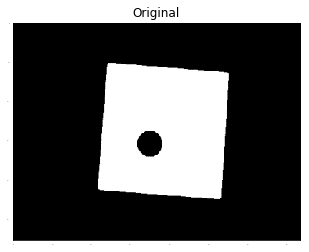

In [556]:
sqcir= cv2.imread('image2_folder/Square-circle.png',0)
x = showImg(sqcir)
xt = plt.title('Original')

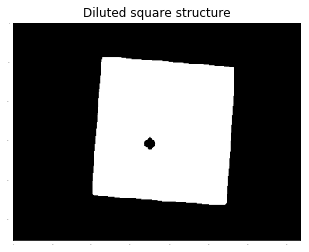

In [557]:
dsqcir1 = dilation_square(sqcir,15)
y = showImg(dsqcir1)
yt = plt.title('Diluted square structure')

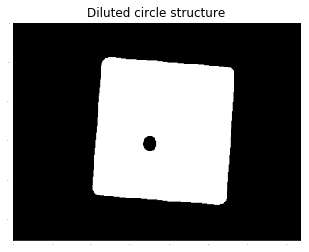

In [558]:
dsqcir2 = dilation_circle(sqcir,15)
y = showImg(dsqcir2)
yt = plt.title('Diluted circle structure')

#### The difference between using circle and square structures:- using the circle structure in the second image maintains the shape of the black circle in the middle while using the square structure causes the circle to disshape

### 2- CameraMan image

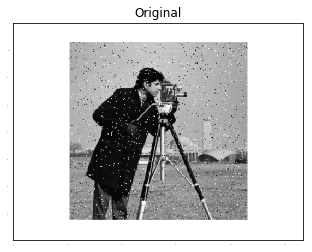

In [559]:
caman= cv2.imread('image2_folder/Cameraman.png',0)
x = showImg(caman)
xt = plt.title('Original')

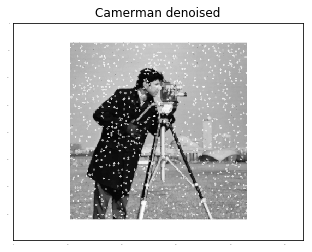

In [560]:
dcaman = dilation_circle(caman,3)
y = showImg(dcaman)
yt = plt.title('Camerman denoised')

### 3- Lady image

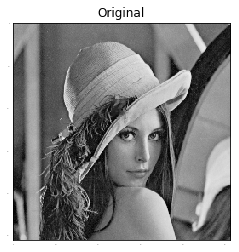

In [561]:
lady= cv2.imread('image2_folder/Lady.png',0)
x = showImg(lady)
xt = plt.title('Original')

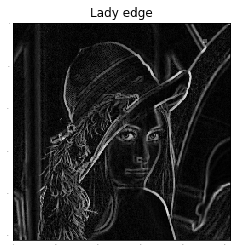

In [562]:
dlady = edge_dilation(lady,5)
y = showImg(dlady)
yt = plt.title('Lady edge')

#### Get Contrast of image to whiten the edges, then use dilation to increase the white region then by subtracting the contrasted image from the diluted image we get the edges

## 2.2- Erosion

In [563]:
def erode_square(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
    tsq = cv2.erode(img,kernel,iterations=1)
    return tsq
def erode_circle(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
    tci = cv2.erode(img,kernel,iterations=1)
    return tci
def erode_cross(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(ksize,ksize))
    tcr = cv2.erode(img,kernel,iterations=1)
    return tcr
def circleDisplay(img,ksize,threh):
    ret,bimg = cv2.threshold(img,threh,255,cv2.THRESH_BINARY)
    bimg = contrast(bimg)
    td = erode_circle(bimg, ksize)
    td = contrast(td)
    return td

### 4- Circle image

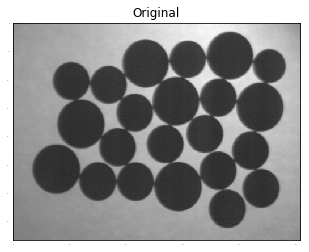

In [564]:
circle= cv2.imread('image2_folder/Circle.png',0)
x = showImg(circle)
xt = plt.title('Original')

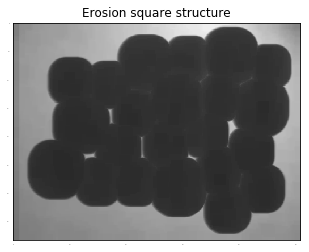

In [565]:
ecircle1 = erode_square(circle,20)
y = showImg(ecircle1)
yt = plt.title('Erosion square structure')

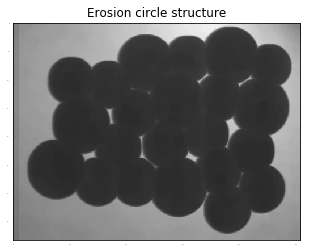

In [566]:
ecircle2 = erode_circle(circle,20)
y = showImg(ecircle2)
yt = plt.title('Erosion circle structure')

#### Eroding the background of the circles ( since the circles are in black) causes the growth of the circles scale, the Square structure dishapes the circles while the circle structure maintains the circles

### 5- Display Circles

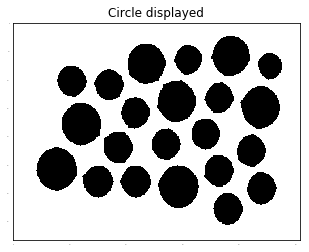

In [567]:
dcircle = circleDisplay(circle,10,70)
y = showImg(dcircle)
yt = plt.title('Circle displayed')

### 6- Noise Reduction

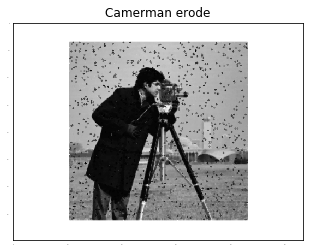

In [568]:
ecaman = erode_circle(caman,3)
y = showImg(ecaman)
yt = plt.title('Camerman erode')

#### Erosion is useful for getting rid of white noise while dilution is useful for getting rid of black noise

## 2.3- Opening and Closing

In [569]:
def open_square(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
    tsq = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return tsq
def open_circle(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
    tci = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return tci
def open_cross(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(ksize,ksize))
    tcr = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return tcr

In [570]:
def close_square(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize,ksize))
    tsq = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return tsq
def close_circle(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
    tci = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return tci
def close_cross(img,ksize):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(ksize,ksize))
    tcr = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return tcr

In [571]:
def countCircles(img,dp,mindist,para1,para2,minr,maxr):
    out = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    circ = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp,mindist,param1 = para1,param2 = para2,minRadius=minr,maxRadius=maxr)
    print("Number of Circles: ")
    print(circ.shape[1])
    if circ is not None:
        circ = np.round(circ[0, :]).astype("int")
        i = 1
        for (x, y, r) in circ:
            cv2.circle(out, (x, y), r, (0, 255, 0), 2)
            cv2.putText(out,str(i),(x - 5, y + 3), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255),2,cv2.LINE_AA)
            i = i + 1
            ##cv2.rectangle(out, (x - 1, y - 1), (x + 1, y + 1), (0, 128, 255), 3)
    return out
def countLines(img,threh1,threh2,filterSize,angle,rho,threh,mll,mlg):
    image = np.copy(img)
    out = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    edges = cv2.Canny(image,threh1,threh2,filterSize)
    edges = image - edges
    lin = cv2.HoughLinesP(edges,rho,(np.pi/180)*angle,threh,mll,maxLineGap=mlg)
    if lin is not None:
        print(len(lin))
        for line in lin:
            x1, y1, x2, y2 = line[0]
            cv2.line(out, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return  out

def countLines1(img):
    image = np.copy(img)
    contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print("Number of Lines: ")
    print(len(contours))
    return contours

### 7- Circle and Lines image

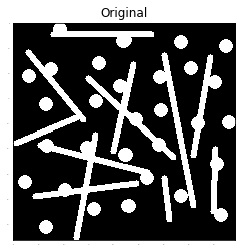

In [572]:
cirli= cv2.imread('image2_folder/Circle_and_Lines.png',0)
x = showImg(cirli)
xt = plt.title('Original')

### a) separate the circles from the lines

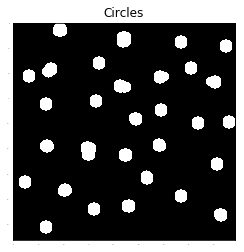

In [573]:
circles = open_circle(cirli,11)
y = showImg(circles)
yt = plt.title('Circles')

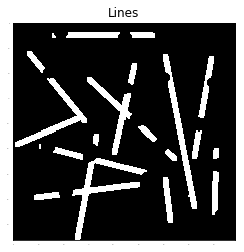

In [574]:
tlines = cirli - circles
lines = open_square(tlines,2)
y = showImg(lines)
yt = plt.title('Lines')

### b) count how many circles and how many lines

Number of Circles: 
30


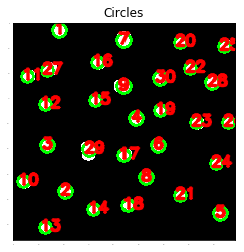

In [575]:
cir = countCircles(circles,1,5,120,8,0,9)
y = showImg2(cir)
yt = plt.title('Circles')

Number of Lines: 
20


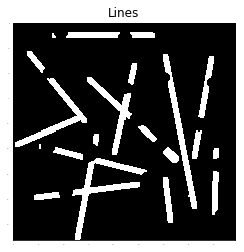

In [576]:
##li = countLines(lines,150,350,5,1,1,50,100,40)
line = countLines1(lines)
cnt = line[4]
out = np.copy(lines)
out = cv2.drawContours(out, [cnt], 0, (255,0,0), 3)
a = showImg(out)
at = plt.title('Lines')

### Q12) replace the sky

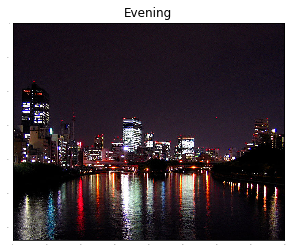

In [577]:
even= cv2.imread('image2_folder/evening.jpg',1)
x = showImg2(even)
xt = plt.title('Evening')

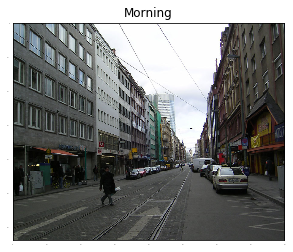

In [578]:
morn= cv2.imread('image2_folder/morning.jpg',1)
width = int(even.shape[1] )
height = int(even.shape[0])
dim = (width, height) 
morn = cv2.resize(morn, dim, interpolation = cv2.INTER_AREA) 
x = showImg2(morn)
xt = plt.title('Morning')

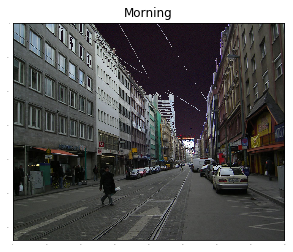

In [579]:
height, width = morn.shape[:2]
tmorn = np.copy(morn)
for i in range(width):
    for j in range(height):
        pixel = morn[j, i]
        if np.all(pixel >= [200, 200, 200]):
            tmorn[j, i] = even[j, i] 
x = showImg2(tmorn)
xt = plt.title('Morning')

### test test

### Q13) count coin

In [580]:
import statistics as st
def countCoins(img1,dp,mindist,para1,para2,minr,maxr):
    #out = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    out = np.copy(img1)
    circ = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp,mindist,param1 = para1,param2 = para2,minRadius=minr,maxRadius=maxr)
    coinValue = 0
    bigValue = 50
    smallValue = 25
    if circ is not None:
        circ = np.round(circ[0, :]).astype("int")
        tt = [tcirc[2] for tcirc in circ]
        l = st.mean(tt)
        for (x, y, r) in circ:
            color = (0, 0, 255)
            if r <= l:
                color = (255,0,0)
                coinValue += smallValue
                value = str(smallValue)
            if r > l:
                coinValue += bigValue
                value = str(bigValue)
            cv2.circle(out, (x, y), r, color, 3)
            cv2.putText(out,value,(x - 5, y + 3), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 255, 255),2,cv2.LINE_AA)
        print("Total Coin Value: ")
        print(coinValue)
    return out
    

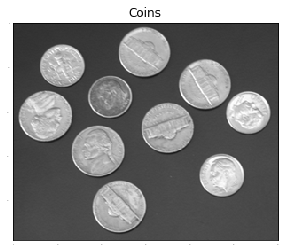

In [581]:
coins= cv2.imread('image2_folder/coins.png',1)
x = showImg2(coins)
xt = plt.title('Coins')

Total Coin Value: 
400


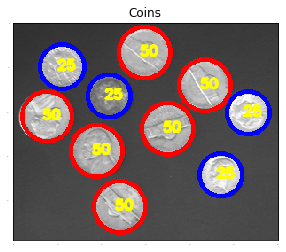

In [582]:
tcoins= countCoins(coins,1.4,40,200,30,0,30)
x = showImg2(tcoins)
xt = plt.title('Coins')

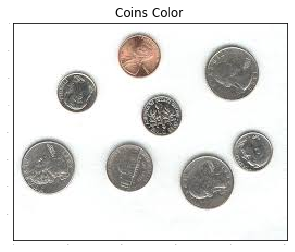

In [583]:
coins1= cv2.imread('image2_folder/coins_color.jpeg',1)
x = showImg2(coins1)
xt = plt.title('Coins Color')

Total Coin Value: 
300


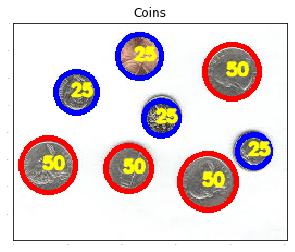

In [584]:
tcoins1= countCoins(coins1,1.2,40,200,30,0,30)
x = showImg2(tcoins1)
xt = plt.title('Coins')